# **Vendas de Jogos de Video Games**

Integrantes do grupo:
* Alexandre Zamora Zerbini Denigres
* Clério Fernandes
* Lucas Vinícius Santos De Lima
* Rayssa R. Oliveira De Faria
* Thiago Manata Michaelsen

<br>


[Link do dataset](https://www.kaggle.com/datasets/gregorut/videogamesales/data)

## 1. Introdução

O universo dos videogames é vasto e diversificado, refletindo uma indústria dinâmica que evolui constantemente. Este projeto de Data Science propõe-se a explorar e extrair insights valiosos a partir de um conjunto de dados abrangente sobre vendas de jogos, abarcando informações cruciais como plataformas de lançamento, gêneros, anos de lançamento e vendas globais.

O dataset em análise contém uma lista de videogames com vendas superiores a 100.000 cópias, gerado a partir de uma raspagem do site vgchartz.com. Com campos que abrangem desde o ranking de vendas até detalhes específicos como vendas por região e editora, oferece uma base sólida para análises exploratórias e a construção de modelos preditivos. A abordagem metodológica adotada compreende desde a importação e limpeza dos dados até a implementação de modelos de machine learning supervisionados e não supervisionados. O trabalho visa não apenas compreender os padrões de vendas, mas também explorar agrupamentos naturais entre os jogos e identificar associações frequentes entre suas características.

Ao longo deste documento, iremos conduzir uma análise detalhada dos dados, aplicar técnicas de pré-processamento, modelagem preditiva e explorar a estrutura intrínseca dos jogos por meio de algoritmos de clusterização. A compreensão resultante não apenas enriquecerá nosso conhecimento sobre a indústria de videogames, mas também poderá orientar decisões estratégicas e insights valiosos para os interessados no mercado de entretenimento digital.

## 2. Análise Exploratória

### Tratamento dos dados

In [ ]:
# Importação das bibliotecas principais

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import sklearn.datasets as skdata
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

In [ ]:
# Importação das credenciais do Kaggle (arquivo 'kaggle.json')

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tmmichaelsen","key":"5e96166ad84bc323ffab34aedeeecfbd"}'}

In [ ]:
# Instalação da biblioteca do Kaggle:
!pip install -q kaggle

In [ ]:
# Configurações para utilização do arquivo 'kaggle.json':
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# Download do zip contendo as bases de dados:
!kaggle datasets download -d gregorut/videogamesales
# Extração do zip:
!unzip videogamesales.zip

100% 381k/381k [00:00<00:00, 997kB/s]
100% 381k/381k [00:00<00:00, 996kB/s]
Archive:  videogamesales.zip
  inflating: vgsales.csv             


In [ ]:
df = pd.read_csv("vgsales.csv")

In [ ]:
df.shape

(16598, 11)

In [ ]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()
print(df.isnull().sum(), "\n\n", df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64 

 Rank              0
Name          

In [ ]:
df = df.dropna()
df = df.drop(columns=['Rank'], axis=1)
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int64  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.00,16291.00,16291.00,16291.00,16291.00,16291.00
mean,2006.41,0.27,0.15,0.08,0.05,0.54
std,5.83,0.82,0.51,0.31,0.19,1.57
min,1980.00,0.00,0.00,0.00,0.00,0.01
25%,2003.00,0.00,0.00,0.00,0.00,0.06
50%,2007.00,0.08,0.02,0.00,0.01,0.17
75%,2010.00,0.24,0.11,0.04,0.04,0.48
max,2020.00,41.49,29.02,10.22,10.57,82.74


In [ ]:
for column in df.select_dtypes(include='object'):
  print(f'{column}: {df[column].nunique()}')

Name: 11325
Platform: 31
Genre: 12
Publisher: 576


<Axes: >

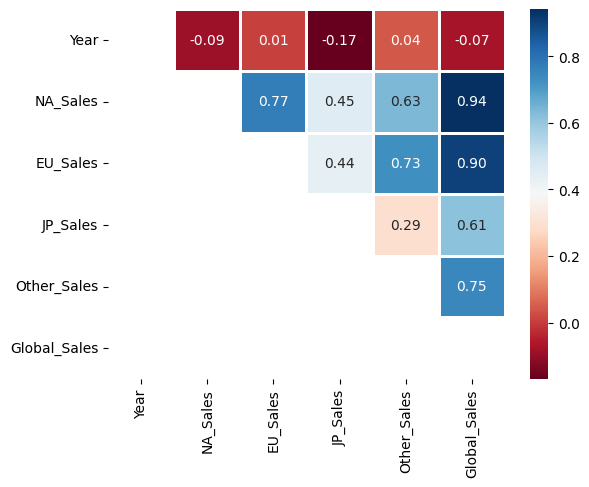

In [ ]:
# Mostra a correlação entre cada feature
sns.heatmap(data=df.corr(), mask=np.tril(df.corr()), annot=True, fmt='.2f', cmap='RdBu', linewidths=2)

### Questionamentos:

#### 1 - Qual o genero de jogo mais lançado?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

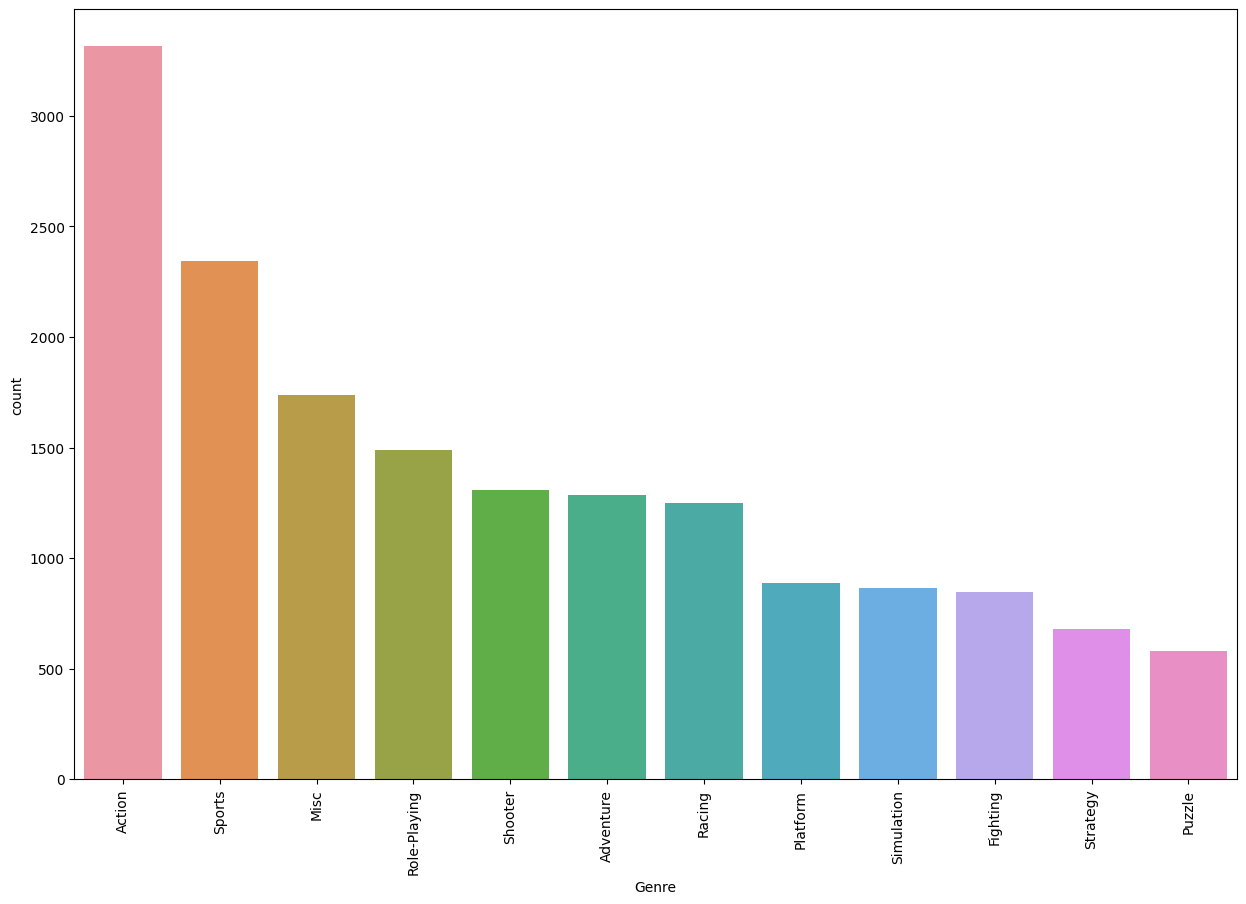

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)

Os gêneros mais lançados foram Ação, com 3316 jogos, e Esportes, com 2346 jogos.

#### 2 - Qual o ano com pico de lançamento de jogos?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

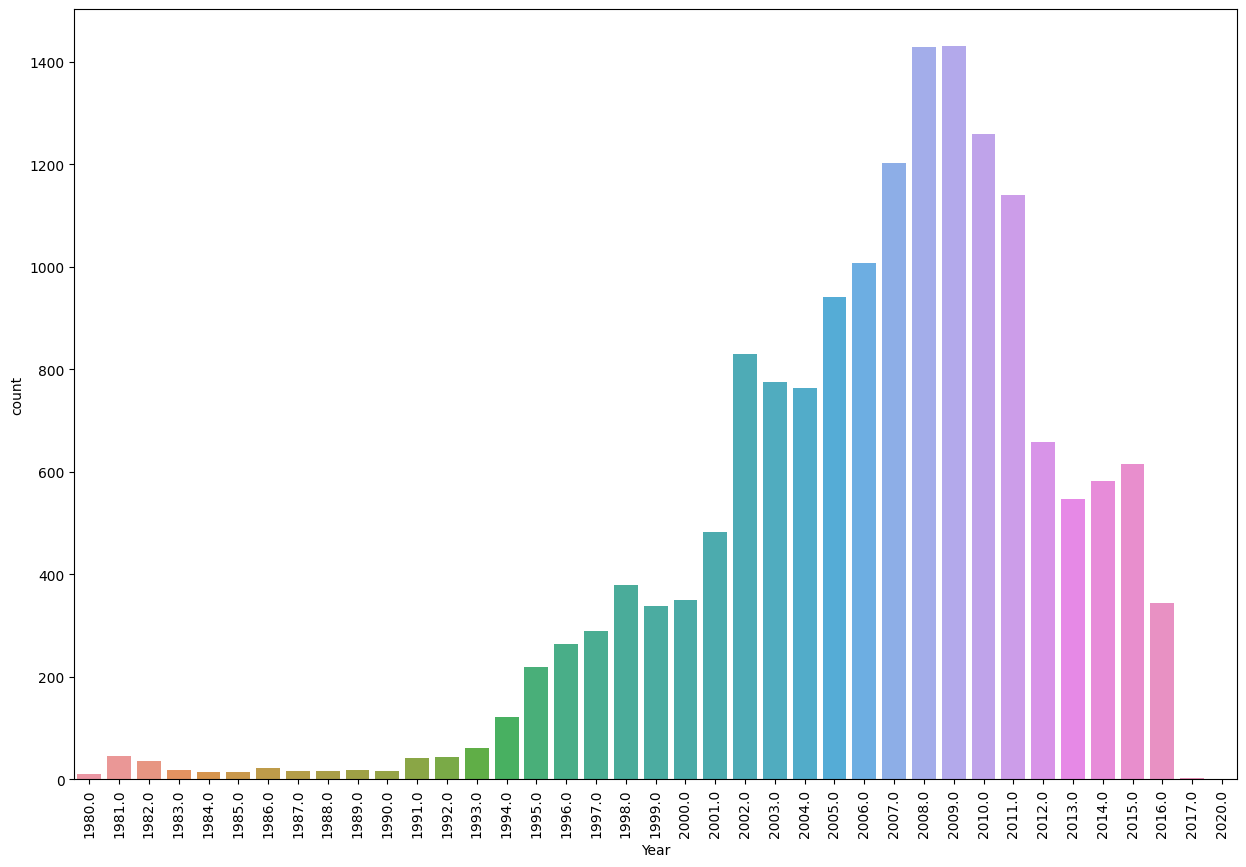

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df)
plt.xticks(rotation=90)

O período de maior lançamento de jogos foram os anos entre 2005 e 2011, com pico em 2009 de 1431 jogos lançados

#### 3 - Qual console teve o maior valor de venda global?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'PS4'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'XB'),
  Text(11, 0, 'GB'),
  Text(12, 0, 'NES'),
  Text(13, 0, '3DS'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

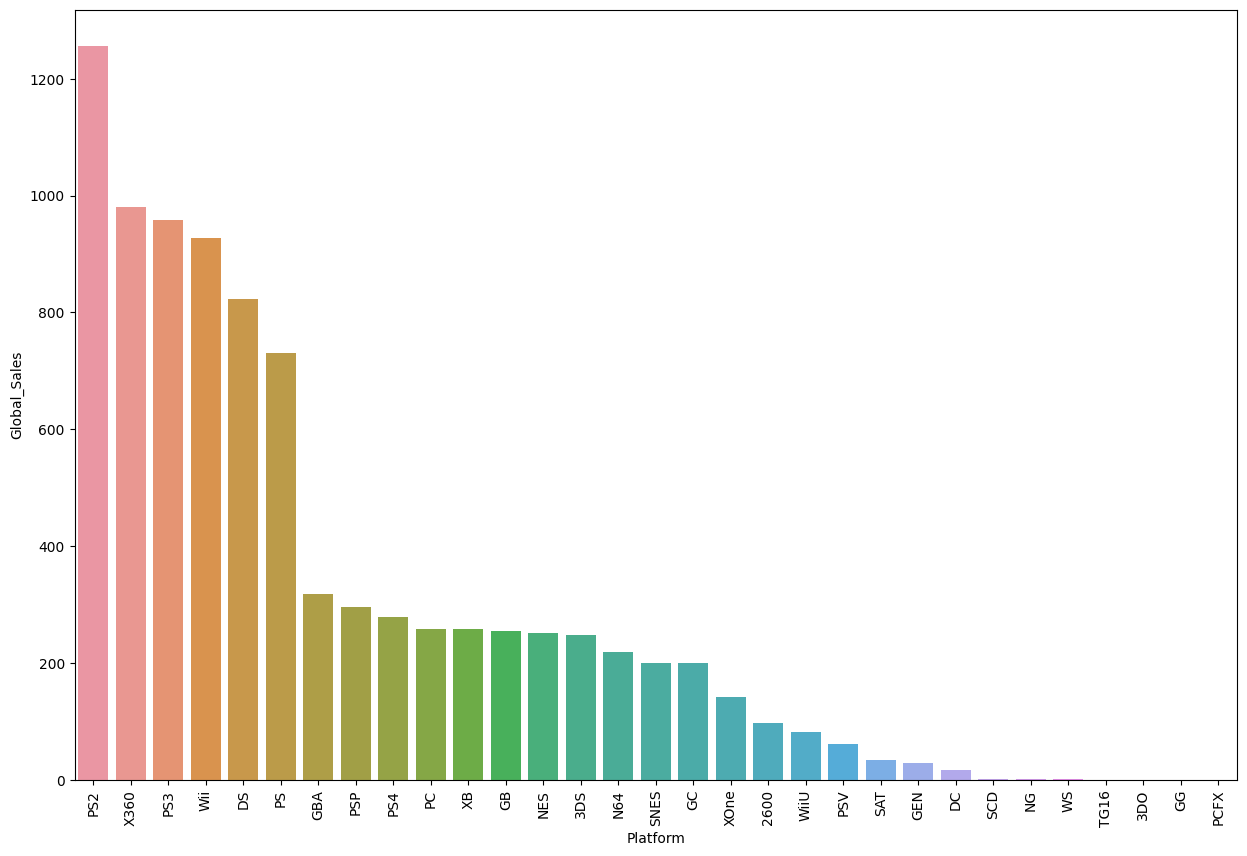

In [ ]:
df_platform = df.groupby(by=['Platform'])['Global_Sales'].sum()
df_platform = df_platform.reset_index()
df_platform = df_platform.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=df_platform)
plt.xticks(rotation=90)

Os consoles com maior número de venda de jogos são, em ordem, PlayStation 2, XBOX360, PlayStation 3, Nintendo Wii, Nintendo DS e PlayStation.

#### 4 - Qual o jogo com maior valor de venda global?

KeyError: ignored

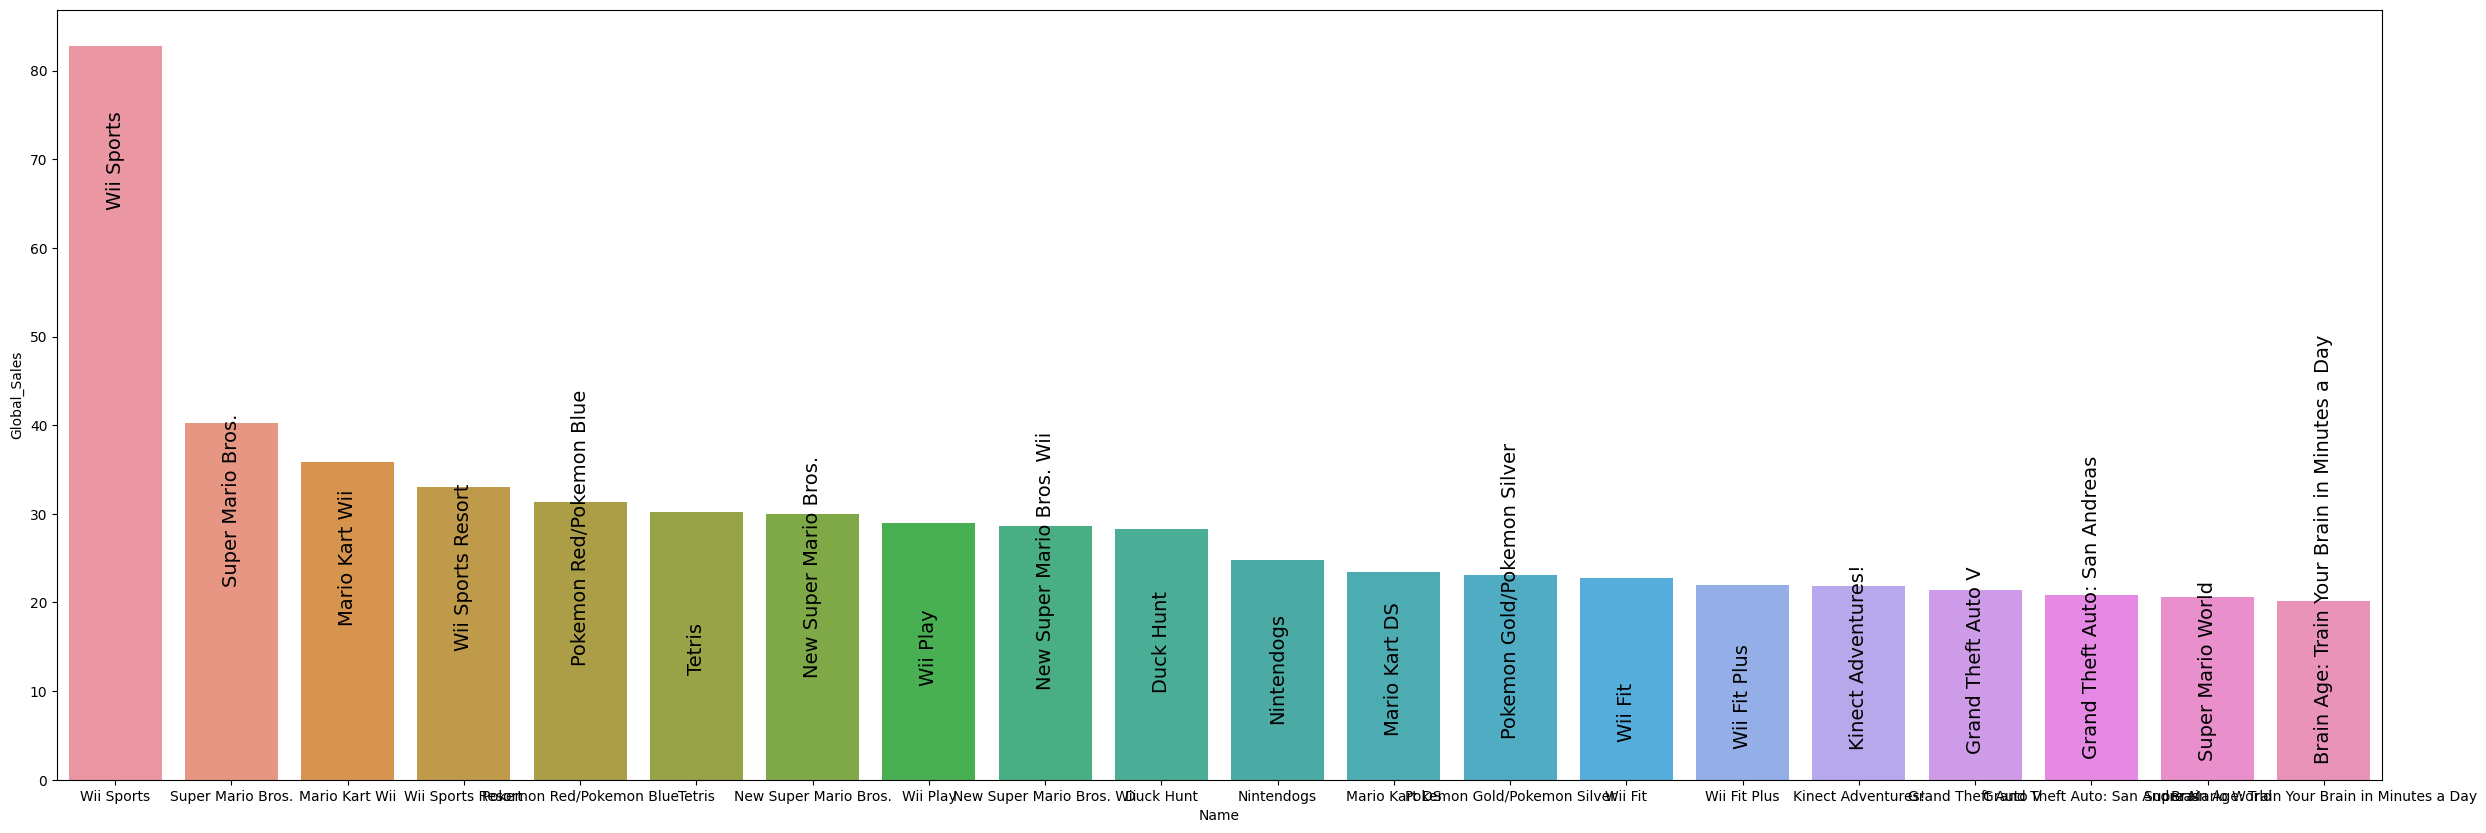

In [ ]:
df_jogos = df.head(20)
df_jogos = df_jogos[['Name', 'Year', 'Genre', 'Global_Sales']]
df_jogos = df_jogos.sort_values(by=['Global_Sales'], ascending=False)
name = df_jogos['Name']
year = df_jogos['Year']
y = np.arange(0, 20)
plt.figure(figsize=(30, 10))
g = sns.barplot(x='Name', y='Global_Sales', data=df_jogos)
index = 0
for value in df['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, df_jogos['Year'], fontsize=14, rotation=90)
plt.xlabel('Ano de Lançamento')
plt.show()

O jogo mais vendido no período analisado foi Wii Sports, com 82.74 milhões de unidades

#### 5 - Qual o genero de jogo mais consumido por região?

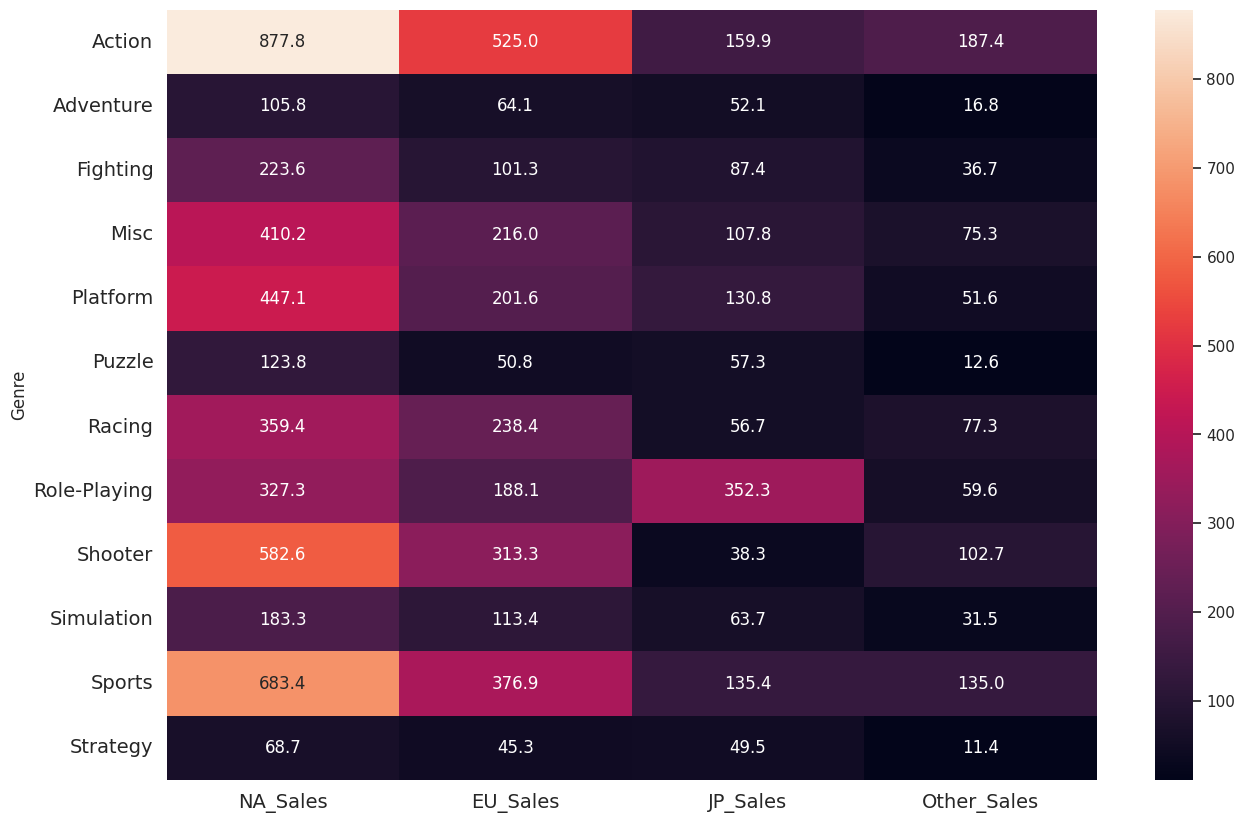

In [ ]:
genero = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
genero = genero.groupby(by=['Genre']).sum()

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(genero, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Em todas as regiões o genero mais vendido foi o de Ação, exceto para o Japão, cujo genero mais vendido foi o de Role-Playing.

#### 6 - Qual a maior publicadora de jogos?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

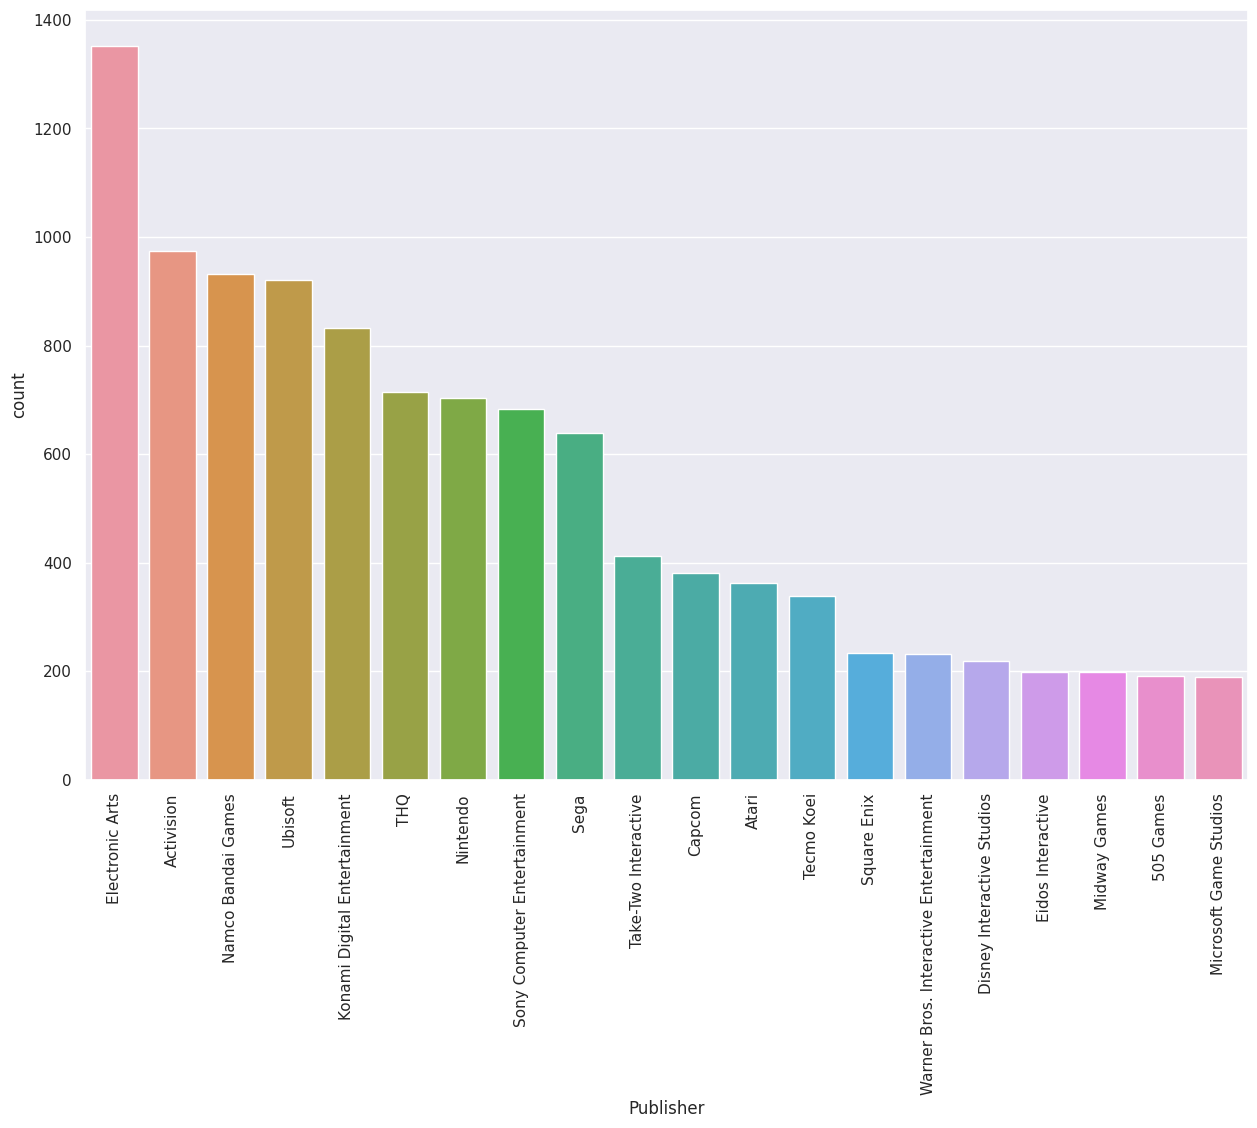

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

As maiores publicadoras de jogos, em ordem, são a Electronic Arts, Activision e Namco Bandai Games.

#### 7 - Qual foi a maior publicadora de jogos por ano?

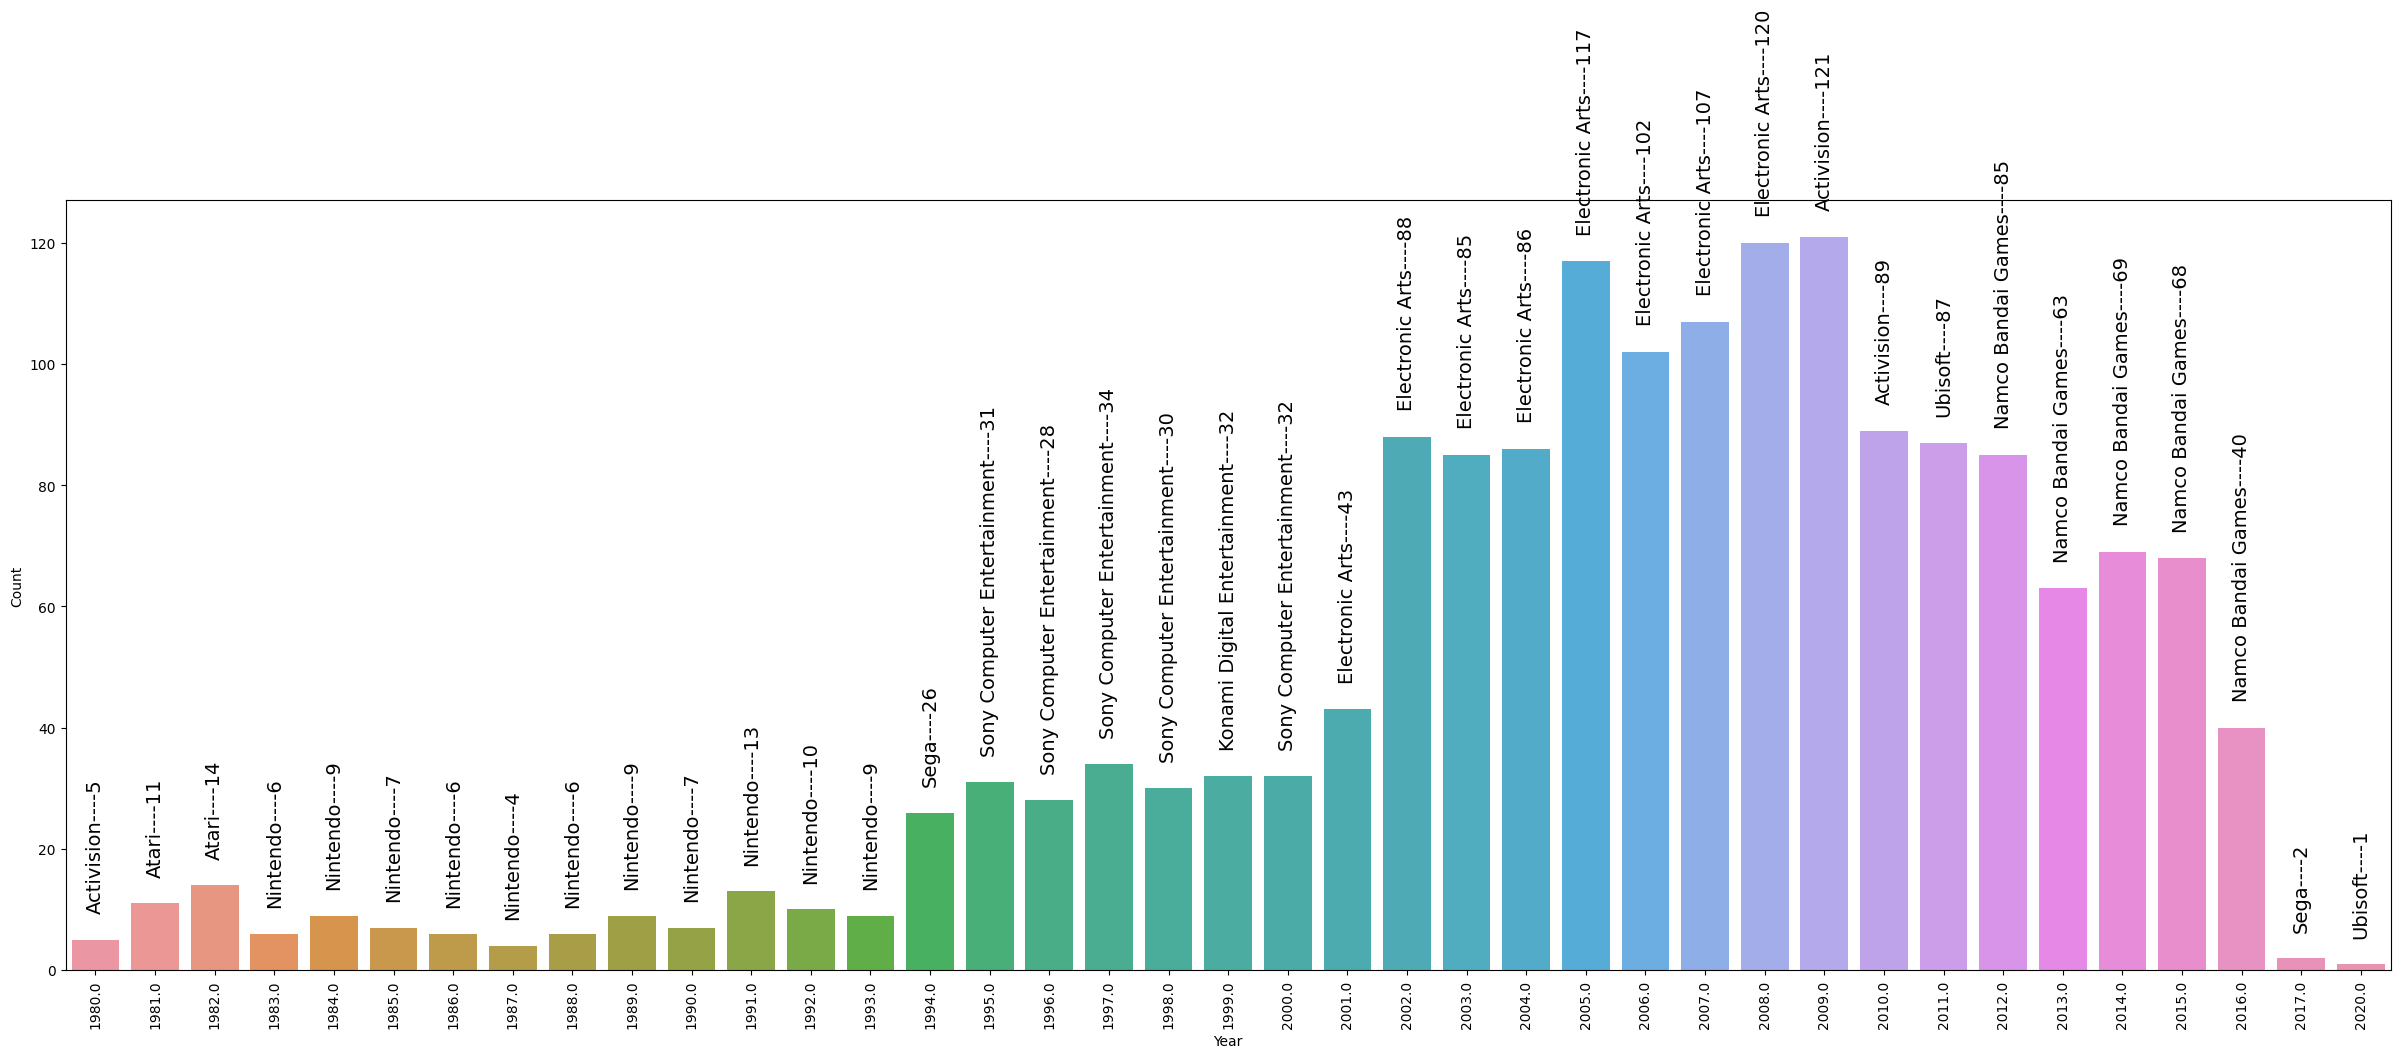

In [ ]:
top_publisher =  df[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)

publisher= top_publisher_count['Publisher']

plt.figure(figsize=(30, 10))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

Observa-se 4 grandes agrupamentos de anos consecutivos com a mesma publicadora no topo. O primeiro período foi de 1983 à 1993 pela Nintendo, seguido de 1995 à 1999 pela Sony Computer Entertainment, 2001 à 2008 pela Electronic Arts, e 2012 à 2016 pela Namco Bandai Games.

#### Problemática:

In [ ]:
df.loc[df['Name'] == 'Need for Speed: Most Wanted']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


In [ ]:
df2 = pd.get_dummies(df, columns = ["Platform"])
df2 = df2.groupby(['Name', 'Year', 'Genre', 'Publisher']).sum()
df2 = df2.reset_index()
df2

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_2600,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,'98 Koshien,1998,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41,0,...,0,0,0,0,0,0,0,0,0,0
1,.hack//G.U. Vol.1//Rebirth,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,0,...,0,0,0,0,0,0,0,0,0,0
2,.hack//G.U. Vol.2//Reminisce,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,0,...,0,0,0,0,0,0,0,0,0,0
3,.hack//G.U. Vol.2//Reminisce (jp sales),2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,0,...,0,0,0,0,0,0,0,0,0,0
4,.hack//G.U. Vol.3//Redemption,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12237,thinkSMART FAMILY!,2010,Misc,Conspiracy Entertainment,0.03,0.00,0.00,0.00,0.03,0,...,0,0,0,0,0,1,0,0,0,0
12238,thinkSMART: Chess for Kids,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01,0,...,0,0,0,0,0,0,0,0,0,0
12239,uDraw Studio,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.46,0,...,0,0,0,0,0,1,0,0,0,0
12240,uDraw Studio: Instant Artist,2011,Misc,THQ,0.09,0.10,0.00,0.02,0.21,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
df3 = df2.loc[df2['Name'] == 'Need for Speed: Most Wanted']
df3.loc[:, (df3 != 0).any(axis=0)]

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS2,Platform_PS3,Platform_PSV,Platform_WiiU,Platform_X360,Platform_XB
7081,Need for Speed: Most Wanted,2005,Racing,Electronic Arts,4.44,2.84,0.10,0.71,8.09,1,1,1,1,1,0,0,0,1,1
7082,Need for Speed: Most Wanted,2012,Racing,Electronic Arts,1.71,2.89,0.08,1.03,5.71,0,0,0,1,0,1,1,0,1,0
7083,Need for Speed: Most Wanted,2013,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28,0,0,0,0,0,0,0,1,0,0


In [ ]:
for column in df.drop(columns=['Rank', 'Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']):
  print(df[column].value_counts())
  print('\n\n')

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64



2009.00    1431
2008.00    1428
2010.00    1259
2007.00    1202
2011.00    1139
2006.00    1008
2005.00     941
2002.00     829
2003.00     775
2004.00     763
2012.00     657
2015.00     614
2014.00     582
2013.00     546
2001.00     482
1998.00     379
2000.00     349
2016.00     344
1999.00     338
1997.00     289
1996.00     263
1995.00     219
1994.00     121
1993.00      60
1981.00      46
1992.00      43
1991.00      41
1982.00      36
1986.00      21
1989.00      17
1983.00      17
1990.00      16
1987.00      16
1988.00      15
1985.00      14
1984.

In [ ]:
df.loc[(df['Platform'] == 'Wii') & (df['Year'] == 2006) & (df['Genre'] == 'Sports') & (df['Publisher'] == 'Nintendo')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
7080,7082,Super Swing Golf,Wii,2006.00,Sports,Nintendo,0.14,0.01,0.07,0.01,0.23


# Modelos Supervisionados

## Funções de Pré-Processamento e Avaliação

In [ ]:
consoles = {
    'Sony': ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV'],
    'Microsoft': ['XB', 'X360', 'XOne'],
    'Nintendo': ['DS', 'Wii', 'GBA', 'GC', '3DS', 'N64', 'SNES', 'WiiU', 'NES', 'GB'],
    'PC': ['PC'],
    'Sega': ['SAT', 'DC', 'GEN', 'SCD'],
    'Other': ['2600', 'NG', 'WS', '3DO', 'TG16', 'GG', 'PCFX']
}

In [ ]:
from sklearn.ensemble import  BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Função de Pipe e Pré-Processamento dos dados
# Carrega os dados do Dataset, define as features e o target, divide os dados em treino e teste

# 1º Pipeline - Dados numéricos: Substituir os dados faltantes pela média e padronização/normalização dos dados
# 2º Pipeline - Dados categóricos: Substituir os dados faltantes por uma constante ('Unknown') e aplicar o OneHotEncoder (dummies)
# Separar os dados resultantes dos 2 pipelines nas colunas de treino e de teste

# Importar as bibliotecas

def pipe_pre_process_games():
  # Carregamento dos dados (dataset)
  df = pd.read_csv("vgsales.csv" , index_col = 0)

  # Remoção de colunas não utilizadas no modelo.
  df = df.drop(columns=['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

  # Agrupamento de consoles
  console_to_company = {console: company for company, consoles_list in consoles.items() for console in consoles_list}
  df['Platform'] = df['Platform'].map(console_to_company)

  # Agrupamento de publicadores
  unique = df['Publisher'].value_counts()
  unique = unique[unique < 100].index
  df['Publisher'] = df['Publisher'].apply(lambda x: 'Other' if x in unique else x)

  # # Agrupamento dos anos
  # df['Year'] = (df['Year'] // 10) * 10
  # df.drop(df[df['Year'] == 2020].index, inplace = True)

  # Definição das features e target
  X = df.drop(columns=['Global_Sales'])
  y = df['Global_Sales']

  # Partição dos dados de treino e teste (validação)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

  # ==========================================================
  # Transformação das colunas numéricas
  pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy='mean')),    # Substituição dos dados faltantes pela média
                                ("std_scaler", StandardScaler())])                # Padronização/normalização dos dados
  features_num = X_train.select_dtypes(include=np.number).columns.tolist()
  # ==========================================================
  # Transformação das colunas categóricas
  pipe_feature_cat = Pipeline([("input_cat", SimpleImputer(strategy='constant', fill_value='Unknown')),   # Substituição dos dados faltantes pelo valor 'Unknown'
                               ("onehot", OneHotEncoder())])                                              # Criação de dummies para os dados categóricos
  features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()
  # ==========================================================
  # Aplicação de transformação dos dados de treino tanto nas colunas numéricas quanto nas colunas categóricas
  pre_processador = ColumnTransformer([("tranfr_num", pipe_features_num, features_num),
                                       ("transf_cat", pipe_feature_cat, features_cat)])

  return X_train, X_test, y_train, y_test, pre_processador

##**1. R² (Coeficiente de Determinação)**

**O que é**: R² é como uma nota de escola para o seu modelo, mas em vez de ser de 0 a 10, vai de 0 a 1. Se o modelo tira 1, significa que ele entendeu perfeitamente os dados. Um R² de 0 significa que o modelo não entendeu nada.
**Exemplo:** Se seu modelo está prevendo preços de casas e tem um R² de 0.8, isso quer dizer que ele está capturando 80% das variações nos preços. Se fosse 0.5, só estaria entendendo metade da história sobre os preços.

##**2. MAE (Erro Absoluto Médio)**
**O que é:** Imagine que você está jogando dardos. Cada erro (diferença entre onde o dardo atingiu e o alvo) é medido. Se você errar por 1 cm em um tiro e 3 cm no outro, seu MAE é a média desses erros, ou seja, (1 + 3) / 2 = 2 cm.
**Exemplo:** Se você está prevendo o peso de cães e seu MAE é 2 kg, isso significa que, em média, suas previsões estão desviando 2 kg do peso real.

##**3. RMSE (Raiz do Erro Quadrático Médio)**
**O que é:** RMSE é parecido com o MAE, mas é mais rigoroso com grandes erros. É como se, no jogo de dardos, erros maiores contassem mais. Se você erra por muito, o RMSE aumenta bastante.
**Exemplo:** Usando o exemplo dos cães, se a maioria das suas previsões de peso está próxima do real, mas algumas estão muito erradas (como prever 20 kg quando o cão pesa 40 kg), seu RMSE será alto.

##**4. MAPE (Erro Percentual Absoluto Médio)**
**O que é:** MAPE mede os erros em porcentagem. É útil porque às vezes errar 5 kg em algo que pesa 100 kg não é tão grave, mas errar 5 kg em algo que pesa 10 kg é um erro grande.
**Exemplo:** Se você está vendendo limonadas e prevê que vai vender 100 copos, mas vende 80, seu MAPE é de 20% porque você errou por 20% a quantidade real.

##**Como Usar Essas Métricas para Escolher um Modelo**
- Use **R²** para ver o quão bem seu modelo entende os dados em geral.<br>
- Olhe para o **MAE** para entender o quão grande é o erro médio das suas previsões.<br>
- Verifique o **RMSE** para ter certeza de que não há erros muito grandes sendo cometidos pelo seu modelo.<br>
- Considere o **MAPE** para entender os erros em uma escala relativa, especialmente útil para comparar erros em coisas de diferentes tamanhos ou quantidades.

In [ ]:
def metricas_regressao(estimator):
    # predições de treino
    y_train_pred = estimator.predict(X_train)
    print("\nMétricas de avaliação de treino")
    print(f"R²: {r2_score(y_train, y_train_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_train, y_train_pred):.2f}")

    # predições de teste
    y_pred_test = estimator.predict(X_test)

    print("\nMétricas de avaliação de teste")
    print(f"R²: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.2f}")

## K-Nearest Neighbor

In [ ]:
# Elaboração do modelo
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_games()
pipe_knn = Pipeline([('pre_process', pre_processador),("knn", KNeighborsRegressor())])
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('tranfr_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Year']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Platform', 'Genre',
                                                   'Publisher'])])),
                ('knn', KNeighborsRegressor())])

In [ ]:
# Avaliação do modelo
metricas_regressao(pipe_knn)


Métricas de avaliação de treino
R²: 0.34
MAE: 0.42
RMSE: 1.14
MAPE: 2.86

Métricas de avaliação de teste
R²: 0.04
MAE: 0.55
RMSE: 2.01
MAPE: 360.40


#### Grid Search
**Scoring:** neg_mean_absolute_error <br>
**Modelo:** KNN

In [ ]:
# Definição da estrutura de validação cruzada
splitter = KFold(n_splits = 10, shuffle = True, random_state = 42)
metrica = "neg_mean_absolute_error" # definição da métrica de avaliação do estimador

# Definição dos valores do Grid
param_grid_knn = {
    'knn__n_neighbors': range(2, 150),  # Número de vizinhos
    'knn__weights': ['uniform', 'distance'],  # Peso dos vizinhos
    'knn__p': [1, 2]  # Parâmetro de distância (1 para Manhattan, 2 para Euclidiana)
}

# definição do estimador
KNN = KNeighborsRegressor()

# grid search
grid_knn_reg = GridSearchCV(estimator = pipe_knn,
                            param_grid = param_grid_knn,
                            scoring = metrica,
                            cv = splitter,
                            n_jobs = 11
                            )

grid_knn_reg.fit(X_train, y_train) # aplicação do processo do GridSearch

best_estimator_knn1 = grid_knn_reg.best_estimator_
best_params_knn1 = grid_knn_reg.best_params_

In [ ]:
print(f"Melhores parametros do Grid Search \n  Modelo: KNN \n  Scoring: neg_mean_absolute_error")
print(best_params_knn1)
print('-'*100)

metricas_regressao(best_estimator_knn1)


Melhores parametros do Grid Search 
  Modelo: KNN 
  Scoring: neg_mean_absolute_error
{'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}
----------------------------------------------------------------------------------------------------

Métricas de avaliação de treino
R²: 0.29
MAE: 0.44
RMSE: 1.18
MAPE: 3.13

Métricas de avaliação de teste
R²: 0.10
MAE: 0.54
RMSE: 1.94
MAPE: 3.58


#### Grid Search
**Scoring:** neg_mean_squared_error <br>
**Modelo:** KNN

In [ ]:
# Definição da estrutura de validação cruzada
splitter = KFold(n_splits = 10, shuffle = True, random_state = 42)
metrica = "neg_mean_squared_error"

# grid search
grid_knn_reg = GridSearchCV(estimator = pipe_knn,
                            param_grid = param_grid_knn,
                            scoring = metrica,
                            cv = splitter,
                            n_jobs = 12
                            )

grid_knn_reg.fit(X_train, y_train)

best_estimator_knn2 = grid_knn_reg.best_estimator_
best_params_knn2 = grid_knn_reg.best_params_

In [ ]:
print("Melhores parametros do Grid Search \n Modelo KNN \n Scoring: neg_mean_squared_error")
print(best_params_knn2)
print('-'*100)

metricas_regressao(best_estimator_knn2)

Melhores parametros do Grid Search 
 Modelo KNN 
 Scoring: neg_mean_squared_error
{'knn__n_neighbors': 41, 'knn__p': 1, 'knn__weights': 'uniform'}
----------------------------------------------------------------------------------------------------

Métricas de avaliação de treino
R²: 0.20
MAE: 0.49
RMSE: 1.26
MAPE: 3.84

Métricas de avaliação de teste
R²: 0.09
MAE: 0.54
RMSE: 1.96
MAPE: 3.93


#### Grid Search
**Scoring:** R2 Score<br>
**Modelo:** KNN

In [ ]:
# Definição da estrutura de validação cruzada
splitter = KFold(n_splits = 10, shuffle = True, random_state = 42)
metrica = "r2" # definição da métrica de avaliação do estimador

# definição do estimador
KNN = KNeighborsRegressor()

# grid search
grid_knn_reg = GridSearchCV(estimator = pipe_knn,
                            param_grid = param_grid_knn,
                            scoring = metrica,
                            cv = splitter,
                            n_jobs = -1
                            )

grid_knn_reg.fit(X_train, y_train) # aplicação do processo do GridSearch

best_estimator_knn3 = grid_knn_reg.best_estimator_
best_params_knn3 = grid_knn_reg.best_params_

In [ ]:
print("Melhores parametros do Grid Search \n Modelo KNN \n Scoring: R2")
print(best_params_knn3)
print('-'*100)

metricas_regressao(best_estimator_knn3)

Melhores parametros do Grid Search 
 Modelo KNN 
 Scoring: R2
{'knn__n_neighbors': 42, 'knn__p': 1, 'knn__weights': 'uniform'}
----------------------------------------------------------------------------------------------------

Métricas de avaliação de treino
R²: 0.20
MAE: 0.49
RMSE: 1.26
MAPE: 3.86

Métricas de avaliação de teste
R²: 0.09
MAE: 0.54
RMSE: 1.96
MAPE: 3.95


#### Randomized Search CV
**Scoring:** R2 Score <br>
**Modelo:** KNN

In [ ]:
# Definição da estrutura de validação cruzada
splitter = KFold(n_splits = 10, shuffle = True, random_state = 42)
metrica = "r2" # definição da métrica de avaliação do estimador

# Definição dos valores do Grid
param_dist_knn = {
    'knn__n_neighbors': randint(2, 150),  # Número de vizinhos
    'knn__weights': ['uniform', 'distance'],  # Peso dos vizinhos
    'knn__p': [1, 2]  # Parâmetro de distância (1 para Manhattan, 2 para Euclidiana)
}

# definição do estimador
KNN = KNeighborsRegressor()

# grid search
random_search_knn_reg = RandomizedSearchCV(
    estimator=pipe_knn,
    param_distributions=param_dist_knn,
    scoring='neg_mean_squared_error',
    cv=splitter,
    n_iter=100,  # Número de combinações a serem testadas
    random_state=42,
    n_jobs= 11
)

random_search_knn_reg.fit(X_train, y_train) # aplicação do processo do GridSearch

best_estimator_knn4 = random_search_knn_reg.best_estimator_
best_params_knn4 = random_search_knn_reg.best_params_

In [ ]:
print("Melhores parametros Randomized Search \n Modelo: KNN \n Scoring R2 Score")
print(best_params_knn4)
print('-'*100)

metricas_regressao(best_estimator_knn4)

Melhores parametros Randomized Search 
 Modelo: KNN 
 Scoring R2 Score
{'knn__n_neighbors': 43, 'knn__p': 1, 'knn__weights': 'uniform'}
----------------------------------------------------------------------------------------------------

Métricas de avaliação de treino
R²: 0.19
MAE: 0.49
RMSE: 1.26
MAPE: 3.85

Métricas de avaliação de teste
R²: 0.09
MAE: 0.54
RMSE: 1.96
MAPE: 3.94


# **Análise Comparativa dos Modelos KNN**

## **Modelos KNN Comparados**
- **KNN com Grid Search (Scoring: neg_mean_absolute_error)**
  - *Treino*: R² = 0.29, MAE = 0.44, RMSE = 1.18, MAPE = 3.13
  - *Teste*: R² = 0.10, MAE = 0.54, RMSE = 1.94, MAPE = 3.58

- **KNN com Grid Search (Scoring: neg_mean_squared_error)**
  - *Treino*: R² = 0.20, MAE = 0.49, RMSE = 1.26, MAPE = 3.84
  - *Teste*: R² = 0.09, MAE = 0.54, RMSE = 1.96, MAPE = 3.93

- **KNN com Grid Search (Scoring: R2)**
  - *Treino*: R² = 0.20, MAE = 0.49, RMSE = 1.26, MAPE = 3.86
  - *Teste*: R² = 0.09, MAE = 0.54, RMSE = 1.96, MAPE = 3.95

- **KNN com Randomized Search (Scoring: R2)**
  - *Treino*: R² = 0.19, MAE = 0.49, RMSE = 1.26, MAPE = 3.85
  - *Teste*: R² = 0.09, MAE = 0.54, RMSE = 1.96, MAPE = 3.94

## **Análise e Comparação**
- **Melhor Desempenho no Treino**: KNN com Grid Search (neg_mean_absolute_error)
- **Melhor Desempenho no Teste**: KNN com Grid Search (neg_mean_absolute_error)


## **Conclusão**
O modelo KNN com Grid Search e scoring neg_mean_absolute_error.

## **Decision Tree**

In [ ]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_games()
pipe_dt = Pipeline([('pre_process', pre_processador),("dt", DecisionTreeRegressor())])
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('tranfr_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Year']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Platform', 'Genre',
                                                   'Publisher'])])),
                ('dt', DecisionTreeRegressor())])

In [ ]:
# Avaliação do modelo
metricas_regressao(pipe_dt)


Métricas de avaliação de treino
R²: 0.58
MAE: 0.30
RMSE: 0.91
MAPE: 1.94

Métricas de avaliação de teste
R²: -0.13
MAE: 0.59
RMSE: 2.18
MAPE: 3.53


#### Grid Search CV
**Modelo:** Decision Tree

In [ ]:
param_grid_dt = {
    'dt__criterion': ['mse', 'friedman_mse', 'mae'],
    'dt__max_depth': [None, 5, 10, 15],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

# Configurando e executando o Grid Search
grid_search_df = GridSearchCV(estimator = pipe_dt,
                           param_grid = param_grid_dt,
                           cv = 3,
                            scoring = 'neg_mean_squared_error',
                           n_jobs = -1)

grid_search_df.fit(X_train, y_train)

# Obtendo os melhores parâmetros e o melhor modelo
best_params_df = grid_search_df.best_params_
best_model_df = grid_search_df.best_estimator_

In [ ]:
print("Melhores parametros Grid Search \n Modelo: Decision Tree")
print(best_params_df)
print('-'*100)

metricas_regressao(best_model_df)

Melhores parametros Grid Search 
 Modelo: Decision Tree
{'dt__criterion': 'friedman_mse', 'dt__max_depth': 5, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10}
----------------------------------------------------------------------------------------------------

Métricas de avaliação de treino
R²: 0.19
MAE: 0.52
RMSE: 1.27
MAPE: 4.87

Métricas de avaliação de teste
R²: 0.07
MAE: 0.55
RMSE: 1.98
MAPE: 4.72


##**RESULTADO: Decision Tree**
**Desempenho Comparativo:** Teve um **R²** de 0.19 no treino e 0.07 no teste, inferior ao Random Forest. O **MAE**, **RMSE** e **MAPE** também foram maiores.

## **Random Forest**

In [ ]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_games()
pipe_rf = Pipeline([('pre_process', pre_processador),("rf", RandomForestRegressor())])
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('tranfr_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Year']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Platform', 'Genre',
                                                   'Publisher'])])),
                ('rf', RandomForestRegressor())])

In [ ]:
# Avaliação do modelo
metricas_regressao(pipe_rf)


Métricas de avaliação de treino
R²: 0.54
MAE: 0.34
RMSE: 0.96
MAPE: 2.27

Métricas de avaliação de teste
R²: -0.01
MAE: 0.55
RMSE: 2.06
MAPE: 3.45


#### Grid Search CV
**Modelo:** Random Forest

In [ ]:
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 15],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(estimator = pipe_rf,
                              param_grid = param_grid_rf,
                              cv = 3,
                              scoring = 'neg_mean_squared_error',
                              n_jobs = 11)

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

In [ ]:
print("Melhores parametros Grid Search \n Modelo: Random Forest")
print(best_params_rf)
print('-'*100)

metricas_regressao(best_model_rf)

Melhores parametros Grid Search 
 Modelo: Random Forest
{'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 300}
----------------------------------------------------------------------------------------------------

Métricas de avaliação de treino
R²: 0.35
MAE: 0.42
RMSE: 1.14
MAPE: 2.92

Métricas de avaliação de teste
R²: 0.08
MAE: 0.53
RMSE: 1.97
MAPE: 3.48


## **Melhor Modelo**

**Random Forest**

**Melhores Parâmetros:**
rf__max_depth: None
rf__min_samples_leaf: 4
rf__min_samples_split: 10
rf__n_estimators: 300

**Razões da Escolha:**
**Treino:** Tem o maior **R²** (0.35), indicando que explica 35% da variância. Também possui os menores valores de **MAE** (0.42), **RMSE** (1.14) e **MAPE** (2.92), sugerindo que é o modelo mais preciso e consistente no treino.

**Teste:** Embora o **R²** seja relativamente baixo (0.08), é um dos mais altos entre os modelos analisados. Os valores de **MAE** (0.53), **RMSE** (1.97) e **MAPE** (3.48) também estão entre os melhores, indicando uma boa generalização.

## **SVR**

In [ ]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_games()
pipe_svr = Pipeline([('pre_process', pre_processador),("svr", SVR())])
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('tranfr_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Year']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Platform', 'Genre',
                                                   'Publisher'])])),
                ('svr', SVR())])

In [ ]:
# Avaliação do modelo
metricas_regressao(pipe_svr)


Métricas de avaliação de treino
R²: 0.10
MAE: 0.39
RMSE: 1.33
MAPE: 1.86

Métricas de avaliação de teste
R²: 0.04
MAE: 0.45
RMSE: 2.01
MAPE: 2.05


#### Grid Search CV
**Modelo:** SVR

In [ ]:
param_grid_svr = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [1, 10],
    'svr__epsilon': [0.1, 0.3]
}

# Configurando e executando o Grid Search
grid_search_svr = GridSearchCV(estimator = pipe_svr,
                           param_grid = param_grid_svr,
                           cv = 3,
                          scoring = 'neg_mean_squared_error',
                           n_jobs = 11)

grid_search_svr.fit(X_train, y_train)

# Obtendo os melhores parâmetros e o melhor modelo
best_params_svr = grid_search_svr.best_params_
best_model_svr = grid_search_svr.best_estimator_

In [ ]:
print("Melhores parametros Grid Search \n Modelo: SVR")
print(best_params_svr)
print('-'*100)

metricas_regressao(best_model_svr)

Melhores parametros Grid Search 
 Modelo: SVR
{'svr__C': 10, 'svr__epsilon': 0.3, 'svr__kernel': 'rbf'}
----------------------------------------------------------------------------------------------------

Métricas de avaliação de treino
R²: 0.15
MAE: 0.43
RMSE: 1.29
MAPE: 3.70

Métricas de avaliação de teste
R²: 0.06
MAE: 0.51
RMSE: 1.99
MAPE: 3.86


###**RESULTADO : SVR**
**Desempenho Comparativo:** Apresentou um desempenho inferior com **R²** de 0.15 no treino e 0.06 no teste. O **MAE**, **RMSE** e **MAPE** não foram competitivos em relação ao Random Forest.

## **Adaboosting**

In [ ]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_games()

pipe_ab = Pipeline([('pre_process', pre_processador),
                    ("ab", AdaBoostRegressor(random_state = 55) )])

pipe_ab.fit(X_train, y_train)

param_grid_ab = {
    'ab__n_estimators': [50, 100, 200],
    'ab__learning_rate': [0.01, 0.1, 1],
    'ab__loss': ['linear', 'square', 'exponential']
}

grid_search_ab = GridSearchCV(pipe_ab,
                               param_grid_ab,
                               cv=5,
                              scoring='neg_mean_squared_error',
                               n_jobs=11)

grid_search_ab.fit(X_train, y_train)

best_params_adaboost = grid_search_ab.best_params_
best_model_adaboost = grid_search_ab.best_estimator_

In [ ]:
print("Melhores parametros Grid Search \n Modelo: AdaBoost")
print(best_params_adaboost)
print('-'*100)

metricas_regressao(best_model_adaboost)

Melhores parametros Grid Search 
 Modelo: AdaBoost
{'ab__learning_rate': 0.01, 'ab__loss': 'exponential', 'ab__n_estimators': 50}
----------------------------------------------------------------------------------------------------

Métricas de avaliação de treino
R²: 0.12
MAE: 0.53
RMSE: 1.32
MAPE: 5.15

Métricas de avaliação de teste
R²: 0.07
MAE: 0.57
RMSE: 1.98
MAPE: 5.04


##**Resultado: AdaBoost**
**Desempenho Comparativo:** Obteve um **R²** mais baixo no treino e no teste em comparação com o Random Forest. Os erros **MAE**, **RMSE** e **MAPE** também foram mais altos.

## XGB Boosting

In [ ]:
!pip install xgboost

In [ ]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_games()

pipe_xgb = Pipeline([('pre_process', pre_processador),
                    ("xgb", XGBRegressor(device='gpu', n_estimators = 1000) )])

pipe_xgb.fit(X_train, y_train)

param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 6, 9],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],

}

grid_search_xgb = GridSearchCV(estimator = pipe_xgb,
                               param_grid = param_grid_xgb,
                               cv=5,
                              scoring = 'neg_mean_squared_error',
                               n_jobs = 11)

grid_search_xgb.fit(X_train, y_train)

best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

In [ ]:
print("Melhores parametros Grid Search \n Modelo: XGB Boosting")
print(best_params_xgb)
print('-'*100)

metricas_regressao(best_model_xgb)

Melhores parametros Grid Search 
 Modelo: XGB Boosting
{'xgb__colsample_bytree': 0.6, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}
----------------------------------------------------------------------------------------------------

Métricas de avaliação de treino
R²: 0.20
MAE: 0.49
RMSE: 1.25
MAPE: 4.03

Métricas de avaliação de teste
R²: 0.08
MAE: 0.53
RMSE: 1.96
MAPE: 4.05


### Randomized Search CV
**Modelo:** XGB Boosting

In [ ]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_games()

pipe_xgb = Pipeline([('pre_process', pre_processador),
                    ("xgb", XGBRegressor(device='gpu', n_estimators = 1000) )])

pipe_xgb.fit(X_train, y_train)


param_dist_xgb = {
    'xgb__n_estimators': randint(100, 300),
    'xgb__max_depth': randint(3, 10),
    'xgb__learning_rate': uniform(0.01, 0.3 - 0.01),
    'xgb__subsample': uniform(0.6, 1.0 - 0.6),
    'xgb__colsample_bytree': uniform(0.6, 1.0 - 0.6),

 }
random_search_xgb = RandomizedSearchCV(estimator=pipe_xgb,
                                       param_distributions=param_dist_xgb,
                                       cv=5,
                                       scoring='neg_mean_squared_error',
                                       n_jobs=11,
                                       n_iter=100)  # Adjust n_iter as needed

random_search_xgb.fit(X_train, y_train)

best_params_xgb_random = random_search_xgb.best_params_
best_model_xgb_random = random_search_xgb.best_estimator_

In [ ]:
print("Melhores parametros Grid Search \n Modelo: XGB Boosting")
print(best_params_xgb_random)
print('-'*100)

metricas_regressao(best_model_xgb_random)

Melhores parametros Grid Search 
 Modelo: XGB Boosting
{'xgb__colsample_bytree': 0.686526978136192, 'xgb__learning_rate': 0.04195746544368633, 'xgb__max_depth': 3, 'xgb__n_estimators': 286, 'xgb__subsample': 0.9938141107043811}
----------------------------------------------------------------------------------------------------

Métricas de avaliação de treino
R²: 0.20
MAE: 0.48
RMSE: 1.25
MAPE: 3.96

Métricas de avaliação de teste
R²: 0.09
MAE: 0.53
RMSE: 1.96
MAPE: 3.97


##**RESULTADO XGB Boosting:**
**Desempenho Comparativo:** Embora tenha apresentado um **R²** similar ao Random Forest no teste, seu desempenho geral foi inferior. O **MAE**, **RMSE** e **MAPE** foram consistentemente mais altos.

## **Gradiente Boosting**

In [ ]:
X_train, X_test, y_train, y_test, pre_processor = pipe_pre_process_games()

pipe_gb = Pipeline([('pre_process', pre_processor),
                    ("gb", GradientBoostingRegressor(random_state = 55, learning_rate = 0.1, n_estimators = 100))])

pipe_gb.fit(X_train, y_train)


param_grid_gb = {
    'gb__n_estimators': [100, 200, 300],
    'gb__max_depth': [3, 6, 9],
    'gb__learning_rate': [0.01, 0.1, 0.3],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 3, 5],
}


grid_search_gb = GridSearchCV(
    estimator = pipe_gb,
    param_grid = param_grid_gb,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = 11
)

grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

In [ ]:
print("Melhores parametros Grid Search \n Modelo: Gradient Boosting")
print(best_params_gb)
print('-'*100)

metricas_regressao(best_model_gb)

Melhores parametros Grid Search 
 Modelo: Gradient Boosting
{'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__min_samples_leaf': 5, 'gb__min_samples_split': 2, 'gb__n_estimators': 200}
----------------------------------------------------------------------------------------------------

Métricas de avaliação de treino
R²: 0.23
MAE: 0.47
RMSE: 1.23
MAPE: 3.73

Métricas de avaliação de teste
R²: 0.09
MAE: 0.53
RMSE: 1.96
MAPE: 3.77


### RESULTADO: Gradient Boosting
**Desempenho Comparativo:** Teve um R² de 0.23 no treino e 0.09 no teste, mas ainda assim inferior ao Random Forest. Os erros MAE, RMSE e MAPE foram mais altos.

##**Boosting Begging Regressor**

In [ ]:
def pipe_pre_process_games():
  # Carregamento dos dados (dataset)
  df = pd.read_csv("vgsales.csv" , index_col = 0)

  # Remoção de colunas não utilizadas no modelo
  df = df.drop(columns=['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

  # Agrupamento de consoles
  console_to_company = {console: company for company, consoles_list in consoles.items() for console in consoles_list}
  df['Platform'] = df['Platform'].map(console_to_company)

  # Agrupamento de publicadores
  unique = df['Publisher'].value_counts()
  unique = unique[unique < 100].index
  df['Publisher'] = df['Publisher'].apply(lambda x: 'Other' if x in unique else x)

  # # Agrupamento dos anos
  # df['Year'] = (df['Year'] // 10) * 10
  # df.drop(df[df['Year'] == 2020].index, inplace = True)

  # Definição das features e target
  X = df.drop(columns=['Global_Sales'])
  y = df['Global_Sales']

  # Partição dos dados de treino e teste (validação)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

  # ==========================================================
  # Transformação das colunas numéricas
  pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy='mean')),    # Substituição dos dados faltantes pela média
                                ("std_scaler", StandardScaler())])                # Padronização/normalização dos dados
  features_num = X_train.select_dtypes(include=np.number).columns.tolist()
  # ==========================================================
  # Transformação das colunas categóricas
  pipe_feature_cat = Pipeline([("input_cat", SimpleImputer(strategy='constant', fill_value='Unknown')),   # Substituição dos dados faltantes pelo valor 'Unknown'
                               ("onehot", OneHotEncoder())])                                              # Criação de dummies para os dados categóricos
  features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()
  # ==========================================================
  # Aplicação de transformação dos dados de treino tanto nas colunas numéricas quanto nas colunas categóricas
  pre_processador = ColumnTransformer([("tranfr_num", pipe_features_num, features_num),
                                       ("transf_cat", pipe_feature_cat, features_cat)])

  return X_train, X_test, y_train, y_test, pre_processador


X_train, X_test, y_train, y_test, pre_processor = pipe_pre_process_games()

pipe_bbr = Pipeline([
    ('pre_process', pre_processor)
    ])

pipe_bbr.fit(X_train, y_train)

knn = KNeighborsRegressor(n_neighbors=9, p=1, weights='uniform')
rf = RandomForestRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300)
dt = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, min_samples_leaf=4, min_samples_split=10)
svr = SVR(C=10, epsilon=0.3, kernel='rbf')

estimators = [
    ("KNN", knn),
    ("RandomForest", rf),
    ("DecisionTree", dt),
    ("SVR", svr)
]

X_train_processed = pipe_bbr.fit_transform(X_train)
X_test_processed = pipe_bbr.transform(X_test)

for name, estimator in estimators:
    # AdaBoost
    ada_boost = AdaBoostRegressor(base_estimator=estimator, random_state=42)
    ada_boost.fit(X_train_processed, y_train)
    ada_boost_score = ada_boost.score(X_test_processed, y_test)
    print(f"AdaBoost with {name}: {ada_boost_score}")
    print("-"*100)

    # Bagging
    bagging = BaggingRegressor(base_estimator=estimator, random_state=42)
    bagging.fit(X_train_processed, y_train)
    bagging_score = bagging.score(X_test_processed, y_test)
    print(f"Bagging with {name}: {bagging_score}")
    print("-"*100)

    # Métricas
    print(f"\nMétricas para AdaBoost with {name}:")
    metricas_regressao_boosting(ada_boost, X_train_processed, X_test_processed, y_train, y_test)
    print("-"*100)
    print(f"\nMétricas para Bagging with {name}:")
    metricas_regressao_boosting(bagging, X_train_processed, X_test_processed, y_train, y_test)
    print("-"*100)

AdaBoost with KNN: -0.030904649737579115
----------------------------------------------------------------------------------------------------
Bagging with KNN: 0.10134957565682357
----------------------------------------------------------------------------------------------------

Métricas para AdaBoost with KNN:

Métricas de avaliação de treino
R²: 0.35
MAE: 0.48
RMSE: 1.13
MAPE: 3.75

Métricas de avaliação de teste
R²: -0.03
MAE: 0.61
RMSE: 2.08
MAPE: 4.18
----------------------------------------------------------------------------------------------------

Métricas para Bagging with KNN:

Métricas de avaliação de treino
R²: 0.30
MAE: 0.44
RMSE: 1.17
MAPE: 3.13

Métricas de avaliação de teste
R²: 0.10
MAE: 0.53
RMSE: 1.94
MAPE: 3.58
----------------------------------------------------------------------------------------------------
AdaBoost with RandomForest: -0.0494343274447151
----------------------------------------------------------------------------------------------------
Baggin

# **Bagging e Boosting: Conceitos e Comparação**

## **Bagging**
- **Conceito**: Bagging, ou Bootstrap Aggregating, é uma técnica de ensemble que visa melhorar a estabilidade e a precisão de algoritmos de machine learning. Ela cria múltiplas versões de um modelo de previsão e as combina para formar um modelo final mais robusto. Cada modelo é treinado em um subconjunto aleatório dos dados.
- **Exemplo Prático**: Um exemplo clássico de bagging é o Random Forest, que combina várias árvores de decisão.

## **Boosting**
- **Conceito**: Boosting é uma técnica de ensemble onde modelos são construídos sequencialmente, com cada novo modelo tentando corrigir os erros do anterior. Diferente do bagging, no boosting os modelos são dependentes e focam em melhorar as previsões onde o modelo anterior errou.
- **Exemplo Prático**: Algoritmos como XGBoost e AdaBoost são exemplos de boosting, onde cada novo modelo incrementa o anterior para melhorar a precisão.

## **Comparação entre Bagging e Boosting**
- **Bagging**:
  - Foca na redução da variância.
  - Constrói modelos independentemente.
  - Bom para reduzir overfitting.
- **Boosting**:
  - Foca na redução do viés.
  - Constrói modelos de forma sequencial.
  - Pode aumentar o risco de overfitting se não for bem ajustado.

# **Análise dos Resultados**

## **Bagging com KNN e RandomForest**
- **Desempenho com KNN**:
  - Resultou em um R² de 0.10 no teste.
  - Embora tenha melhorado o desempenho do KNN puro, ainda foi inferior ao Random Forest puro.

- **Desempenho com RandomForest**:
  - R² de 0.09 no teste, similar ao modelo puro de Random Forest.
  - Não houve melhoria significativa em comparação com o Random Forest sem bagging.

## **Boosting com DecisionTree, RandomForest e SVR**
- **Desempenho com DecisionTree**:
  - AdaBoost com DecisionTree mostrou um R² negativo no teste.
  - Indica que o boosting não melhorou significativamente o desempenho da Decision Tree.

- **Desempenho com RandomForest**:
  - AdaBoost com RandomForest também não mostrou melhorias, com R² negativo no teste.

- **Desempenho com SVR**:
  - AdaBoost com SVR teve um desempenho ligeiramente melhor em comparação com o SVR puro, mas ainda inferior ao Random Forest.

## **Conclusão**
- **Bagging**:
  - Teve alguma eficácia em melhorar o desempenho dos modelos base, mas não superou o Random Forest puro nos seus dados.

- **Boosting**:
  - Não foi muito eficaz com os modelos base escolhidos.
  - Geralmente funciona bem com modelos fracos, mas a eficácia varia conforme o conjunto de dados e configuração dos parâmetros.

- **Escolha do Modelo**:
  - Depende do problema específico, natureza dos dados e complexidade dos modelos.
  - Em alguns casos, um modelo puro pode superar técnicas de ensemble como bagging e boosting, como visto com o Random Forest neste conjunto de dados.


In [ ]:
def metricas_regressao_boosting(estimator, X_train, X_test, y_train, y_test):
    # predições de treino
    y_train_pred = estimator.predict(X_train)
    print("\nMétricas de avaliação de treino")
    print(f"R²: {r2_score(y_train, y_train_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_train, y_train_pred):.2f}")

    # predições de teste
    y_pred_test = estimator.predict(X_test)

    print("\nMétricas de avaliação de teste")
    print(f"R²: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.2f}")

##**RESULTADO FINAL PARA MODELOS SUPERVISIONADOS**




| Modelo / Métrica            | R² Treino | MAE Treino | RMSE Treino | MAPE Treino | R² Teste | MAE Teste | RMSE Teste | MAPE Teste |
|-----------------------------|-----------|------------|-------------|-------------|----------|-----------|------------|------------|
| KNN (neg_mean_absolute_error)| 0.29      | 0.44       | 1.18        | 3.13        | 0.10     | 0.54      | 1.94       | 3.58       |
| KNN (neg_mean_squared_error) | 0.20      | 0.49       | 1.26        | 3.84        | 0.09     | 0.54      | 1.96       | 3.93       |
| KNN (R2)                     | 0.20      | 0.49       | 1.26        | 3.86        | 0.09     | 0.54      | 1.96       | 3.95       |
| KNN (Randomized Search R2)   | 0.19      | 0.49       | 1.26        | 3.85        | 0.09     | 0.54      | 1.96       | 3.94       |
| Decision Tree                | 0.19      | 0.52       | 1.27        | 4.87        | 0.07     | 0.55      | 1.98       | 4.72       |
| Random Forest                | 0.35      | 0.42       | 1.14        | 2.92        | 0.08     | 0.53      | 1.97       | 3.48       |
| SVR                          | 0.15      | 0.43       | 1.29        | 3.70        | 0.06     | 0.51      | 1.99       | 3.86       |
| AdaBoost                     | 0.12      | 0.53       | 1.32        | 5.15        | 0.07     | 0.57      | 1.98       | 5.04       |
| XGB Boosting                 | 0.20      | 0.49       | 1.25        | 4.03        | 0.08     | 0.53      | 1.96       | 4.05       |
| Gradient Boosting            | 0.23      | 0.47       | 1.23        | 3.73        | 0.09     | 0.53      | 1.96       | 3.77       |
| AdaBoost with KNN            | 0.35      | 0.48       | 1.13        | 3.75        | -0.03    | 0.61      | 2.08       | 4.18       |
| Bagging with KNN             | 0.30      | 0.44       | 1.17        | 3.13        | 0.10     | 0.53      | 1.94       | 3.58       |
| AdaBoost with RandomForest   | 0.38      | 0.44       | 1.11        | 3.30        | -0.05    | 0.58      | 2.10       | 3.94       |
| Bagging with RandomForest    | 0.29      | 0.43       | 1.18        | 3.14        | 0.09     | 0.52      | 1.96       | 3.53       |
| AdaBoost with DecisionTree   | -0.05     | 0.66       | 1.44        | 7.20        | 0.06     | 0.71      | 1.99       | 7.06       |
| Bagging with DecisionTree    | 0.20      | 0.50       | 1.26        | 4.75        | 0.07     | 0.55      | 1.97       | 4.64       |
| AdaBoost with SVR            | -0.02     | 0.55       | 1.42        | 4.60        | 0.03     | 0.64      | 2.02       | 4.89       |
| Bagging with SVR             | 0.16      | 0.43       | 1.29        | 3.60        | 0.06     | 0.50      | 1.99       | 3.76       |


# **Modelos Não Supervisionados**

#Análise de Cluster

##K-Means

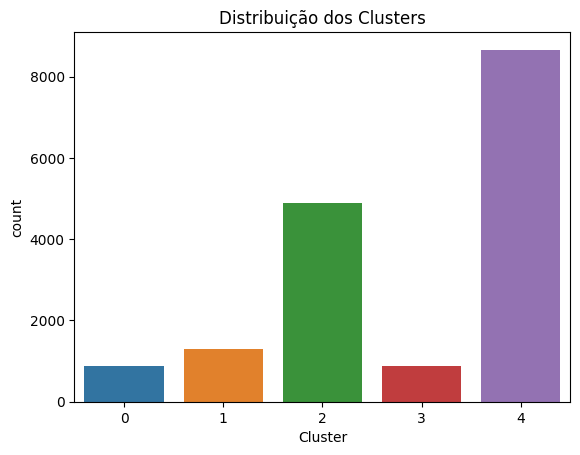

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Carregando os dados
df = pd.read_csv("vgsales.csv", index_col=0)

# Remoção de colunas não utilizadas no modelo.
df = df.drop(columns=['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

# Agrupamento de consoles
# (supondo que você tenha uma variável 'consoles' definida anteriormente)
console_to_company = {console: company for company, consoles_list in consoles.items() for console in consoles_list}
df['Platform'] = df['Platform'].map(console_to_company)

# Agrupamento de publicadores
unique = df['Publisher'].value_counts()
unique = unique[unique < 100].index
df['Publisher'] = df['Publisher'].apply(lambda x: 'Other' if x in unique else x)

# Seleção das features relevantes para clustering
features_cluster = ['Year', 'Genre', 'Publisher', 'Platform']

# Subconjunto do DataFrame apenas com as features de interesse
df_cluster = df[features_cluster]

# Pré-processamento das features categóricas
df_cluster = pd.get_dummies(df_cluster)

# Pré-processamento utilizando pipelines para dados numéricos e categóricos
numeric_features = df_cluster.select_dtypes(include=np.number).columns.tolist()
categorical_features = df_cluster.select_dtypes(exclude=np.number).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Aplicação do pré-processamento
df_cluster_processed = preprocessor.fit_transform(df_cluster)

# Padronização dos dados
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster_processed)

# Aplicação do K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Visualização dos clusters criados
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', data=df)
plt.title('Distribuição dos Clusters')
plt.show()

#Análise de Componentes Principais (PCA)

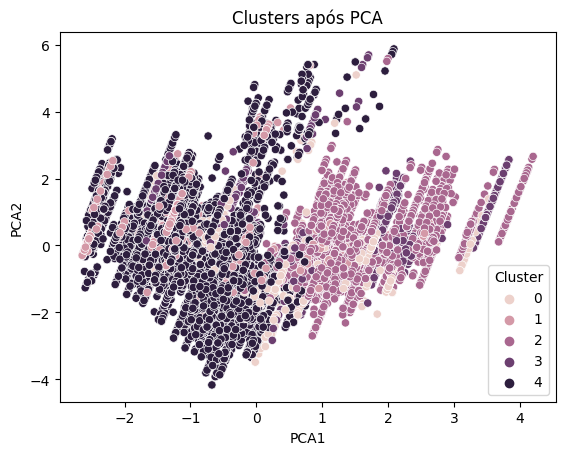

In [ ]:
from sklearn.decomposition import PCA

# Aplicação do PCA para redução de dimensionalidade
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cluster_scaled)

# Adição das componentes principais ao DataFrame
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Visualização dos clusters no espaço bidimensional
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df)
plt.title('Clusters após PCA')
plt.show()


#Associação de Regras

In [ ]:
# Transformação das features categóricas em variáveis binárias
df_association = pd.get_dummies(df[['Genre', 'Publisher', 'Platform']], columns=['Genre', 'Publisher', 'Platform'])

frequent_itemsets = apriori(df_association, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)

# Visualização das regras de associação
print(rules)

         antecedents          consequents  antecedent support  \
0     (Genre_Action)  (Platform_Nintendo)                0.20   
1     (Genre_Action)      (Platform_Sony)                0.20   
2       (Genre_Misc)  (Platform_Nintendo)                0.10   
3     (Genre_Sports)      (Platform_Sony)                0.14   
4  (Publisher_Other)  (Platform_Nintendo)                0.27   
5  (Publisher_Other)      (Platform_Sony)                0.27   

   consequent support  support  confidence  lift  leverage  conviction  \
0                0.38     0.07        0.35  0.93     -0.01        0.96   
1                0.40     0.08        0.41  1.03      0.00        1.02   
2                0.38     0.06        0.54  1.43      0.02        1.35   
3                0.40     0.06        0.44  1.10      0.01        1.07   
4                0.38     0.11        0.40  1.06      0.01        1.04   
5                0.40     0.11        0.41  1.02      0.00        1.01   

   zhangs_metric  
0     

**Associação entre o Gênero Action e a Plataforma Nintendo**:

Antecedentes: Gênero Action (representado pelo código 0.20)
Consequentes: Plataforma Nintendo (representado pelo código 0.38)
Suporte do Antecedente: 20%
Suporte do Consequente: 38%
Suporte Conjunto: 7%
Confiança: 35%
Lift: 0.93
Leverage: -0.01
Conviction: 0.96
Zhang's Metric: -0.09

**Interpretação**: Há uma associação negativa entre jogos do gênero Action e a plataforma Nintendo, indicando que a presença do gênero Action pode diminuir a probabilidade de o jogo ser lançado na plataforma Nintendo.

**Associação entre o Gênero Action e a Plataforma Sony**:

Antecedentes: Gênero Action (20%)
Consequentes: Plataforma Sony (40%)
Suporte do Antecedente: 20%
Suporte do Consequente: 40%
Suporte Conjunto: 8%
Confiança: 41%
Lift: 1.03
Leverage: 0.00
Conviction: 1.02
Zhang's Metric: 0.04

**Interpretação**: Há uma associação positiva entre jogos do gênero Action e a plataforma Sony, sugerindo que jogos desse gênero têm uma probabilidade ligeiramente maior de serem lançados na plataforma Sony.

**Associação entre o Gênero Misc e a Plataforma Nintendo**:

Antecedentes: Gênero Misc (10%)
Consequentes: Plataforma Nintendo (38%)
Suporte do Antecedente: 10%
Suporte do Consequente: 38%
Suporte Conjunto: 6%
Confiança: 54%
Lift: 1.43
Leverage: 0.02
Conviction: 1.35
Zhang's Metric: 0.33

**Interpretação**: Há uma associação positiva forte entre jogos do gênero Misc e a plataforma Nintendo, indicando que jogos desse gênero têm uma probabilidade significativamente maior de serem lançados nessa plataforma.

**Associação entre o Gênero Sports e a Plataforma Sony**:

Antecedentes: Gênero Sports (14%)
Consequentes: Plataforma Sony (40%)
Suporte do Antecedente: 14%
Suporte do Consequente: 40%
Suporte Conjunto: 6%
Confiança: 44%
Lift: 1.10
Leverage: 0.01
Conviction: 1.07
Zhang's Metric: 0.11

**Interpretação**: Há uma associação positiva moderada entre jogos do gênero Sports e a plataforma Sony, sugerindo que jogos desse gênero têm uma probabilidade um pouco maior de serem lançados na plataforma Sony.

**Associação entre o Publisher Other e a Plataforma Nintendo**:

Antecedentes: Publisher Other (27%)
Consequentes: Plataforma Nintendo (38%)
Suporte do Antecedente: 27%
Suporte do Consequente: 38%
Suporte Conjunto: 11%
Confiança: 40%
Lift: 1.06
Leverage: 0.01
Conviction: 1.04
Zhang's Metric: 0.07

**Interpretação**: Há uma associação positiva entre jogos de publishers classificados como Other e a plataforma Nintendo, indicando que esses jogos têm uma probabilidade um pouco maior de serem lançados nessa plataforma.

**Associação entre o Publisher Other e a Plataforma Sony**:

Antecedentes: Publisher Other (27%)
Consequentes: Plataforma Sony (40%)
Suporte do Antecedente: 27%
Suporte do Consequente: 40%
Suporte Conjunto: 11%
Confiança: 41%
Lift: 1.02
Leverage: 0.00
Conviction: 1.01
Zhang's Metric: 0.03

**Interpretação**: Há uma associação positiva entre jogos de publishers classificados como Other e a plataforma Sony, sugerindo que esses jogos têm uma probabilidade um pouco maior de serem lançados nessa plataforma.


#Avaliação do Desempenho do Modelo

In [ ]:
from sklearn.metrics import silhouette_score

# Função para avaliar o desempenho do modelo K-Means
def avaliar_desempenho_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Inércia
    inercia = kmeans.inertia_

    # Silhueta
    silhueta = silhouette_score(X, labels)

    return inercia, silhueta

# Avaliação do K-Means com diferentes números de clusters
for n_clusters in range(2, 8):
    inercia, silhueta = avaliar_desempenho_kmeans(df_cluster_scaled, n_clusters)
    print(f"Número de Clusters: {n_clusters}, Inércia: {inercia:.2f}, Silhueta: {silhueta:.2f}")


# **Conclusão**

Ao longo deste projeto de análise de vendas de games, mergulhamos nas vastas dimensões deste universo dinâmico e multifacetado. Nossa jornada começou com a coleta e exploração do conjunto de dados, um tesouro de informações sobre títulos que conquistaram o mercado global. Através de técnicas de análise de dados, modelagem supervisionada e não supervisionada, buscamos desvendar padrões, identificar correlações e entender o que impulsiona o sucesso de um jogo.

Na etapa de análise exploratória, examinamos as características mais influentes, desde gênero e plataforma até editoras de renome. Descobrimos que a diversidade no mundo dos games é notável, com diferentes gêneros e plataformas atendendo a públicos específicos. A ascensão de certas editoras também foi destacada, evidenciando a importância estratégica na indústria.

A modelagem supervisionada nos permitiu prever as vendas globais de jogos com base em diversas variáveis, proporcionando insights valiosos para profissionais do setor. A utilização de algoritmos como K-Nearest Neighbors, Decision Trees, e Ensemble Models amplificou nossa compreensão das relações complexas entre as variáveis.

Nos modelos não supervisionados, exploramos clusters de jogos semelhantes e identificamos padrões de associação entre diferentes características. A técnica de PCA nos proporcionou uma visão simplificada das interações entre variáveis, enquanto o Apriori revelou associações frequentes, subsidiando estratégias de marketing e desenvolvimento.

Ao interpretar os resultados, percebemos a importância de compreender não apenas os fatores isolados, mas também as interações entre eles. O sucesso de um jogo muitas vezes está enraizado na combinação única de elementos, desde o gênero até a plataforma de lançamento.

Em última análise, este trabalho não apenas oferece insights valiosos para a indústria de games, mas também destaca a complexidade e a riqueza de informações contidas nos dados de vendas de jogos. À medida que nos despedimos deste projeto, reconhecemos que a indústria de games continuará a evoluir, e análises de dados como a nossa desempenham um papel crucial na compreensão e antecipação das tendências.

Agradecemos pela oportunidade de explorar este fascinante universo dos games e esperamos que este trabalho inspire novas investigações e descobertas na interseção entre dados e entretenimento interativo.